---
# VisionSpace Challenge
---
### Description
This Notebook includes all solutions and explainations of all three challenges.
### Requierements
The following cell installs all packages that I used to solve the tasks.
*TODO: Explain the packages*




In [28]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install tensorflow as tf
!pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


# Challenge I
---
## Desciption
The Janus satellite provides information that supports ground exploration missions on Mars. A sample
of the dataset in .csv format and a short description of its columns can be found in this repository:
https://github.com/visionspacetec/ai-interview-challanges
Your goal is to apply Machine Learning techniques to predict Janus’ power consumption.
## Solution
Assumption: As the exact predition goal is not further specified, I set it to a next-hour prediction, this also aligns well with real-time monitoring needs and can be helpful to determine anomalies. Another possibility would be to predict the next 24-hour profile which would be useful for battery planning or solar panel alignment. I decided against this goal as the data set includes only around 20 days and therefore such a prediciton would be really challenging because there might be long-term trends or periodic variations that are not captured by the data.

In [61]:
current_dir_path = os.getcwd()
data_file_path = os.path.join(current_dir, 'SatelliteDataSet.csv')

df = pd.read_csv(data_file)

#features = ["power", "sa", "sx", "sy", "sz", "sunmars_km", 
#            "earthmars_km", "sunmarsearthangle_deg", 
#            "solarconstantmars", "eclipseduration_min", 
#            "occultationduration_min", "flagcomms"]

#All features
features = ["power", "sa", "sx", "sy", "sz", "sunmars_km", 
            "earthmars_km", "sunmarsearthangle_deg", 
            "solarconstantmars", "eclipseduration_min", 
            "occultationduration_min", "flagcomms", 
            "ACROSS_TRACK", "D1PVMC", "D4PNPO", "EARTH", "INERTIAL",
            "MAINTENANCE", "NADIR", "RADIO_SCIENCE", "SLEW", "WARMUP"]

target = "power"

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [62]:
def create_sequences(data, target_column, sequence_length=5):
    x, y = [], []
    for i in range(len(data) - sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length, target_column])
    
    return np.array(x), np.array(y)

data_values = df[features].values

x, y = create_sequences(data_values, target_column=features.index(target), sequence_length=5)

train_val_split = 0.8

train_size = int(len(x)*train_val_split)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])),# TODO check parameters
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 3s 32ms/step - loss: 0.0820 - mae: 0.2249 - val_loss: 0.0523 - val_mae: 0.1893
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0355 - mae: 0.1573 - val_loss: 0.0496 - val_mae: 0.1874
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0367 - mae: 0.1587 - val_loss: 0.0476 - val_mae: 0.1851
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0385 - mae: 0.1587 - val_loss: 0.0504 - val_mae: 0.1849
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0375 - mae: 0.1569 - val_loss: 0.0476 - val_mae: 0.1830
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0375 - mae: 0.1557 - val_loss: 0.0472 - val_mae: 0.1821
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0354 - mae: 0.1524 - val_loss: 0.0454 - val_mae: 0.1815
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0364 - 

25/25 [==============================] - 0s 3ms/step - loss: 0.0258 - mae: 0.1293 - val_loss: 0.0494 - val_mae: 0.1805
Epoch 64/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0222 - mae: 0.1169 - val_loss: 0.0523 - val_mae: 0.1830
Epoch 65/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0221 - mae: 0.1151 - val_loss: 0.0515 - val_mae: 0.1821
Epoch 66/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0219 - mae: 0.1171 - val_loss: 0.0500 - val_mae: 0.1803
Epoch 67/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0220 - mae: 0.1184 - val_loss: 0.0569 - val_mae: 0.1917
Epoch 68/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0252 - mae: 0.1285 - val_loss: 0.0528 - val_mae: 0.1859
Epoch 69/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0199 - mae: 0.1126 - val_loss: 0.0565 - val_mae: 0.1911
Epoch 70/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0236 - mae: 0

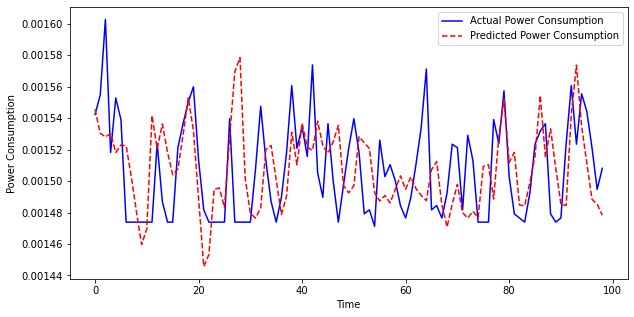

In [66]:
y_pred = model.predict(x_test)

y_test_rescaled = scaler.inverse_transform(np.column_stack([y_test] * len(features)))[:, 0]
y_pred_rescaled = scaler.inverse_transform(np.column_stack([y_pred.flatten()]*len(features)))[:, 0]

#print("test:", len(y_test_rescaled))
#print("pred:", y_pred_rescaled)

plt.figure(figsize=(10,5))
plt.plot(y_test_rescaled, label="Actual Power Consumption", color="blue")
plt.plot(y_pred_rescaled, label="Predicted Power Consumption", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()